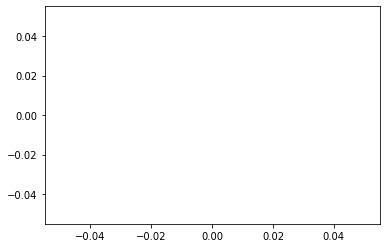

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import LeisureExp, get_random_prob

In [2]:
prob = LeisureExp()

In [3]:
display(Latex(prob.general_setup()))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

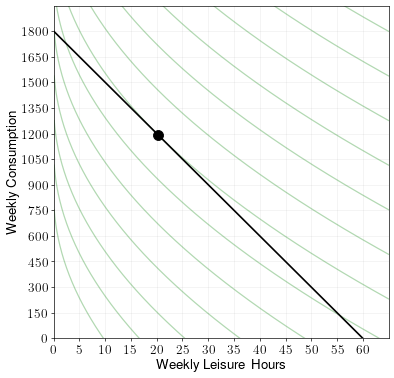

{'c': 1192.5, 'l': 20.250000000000004, 'h': 39.75, 'U': 2407.5}

In [4]:
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, with_solution=True)
prob.sol

In [5]:
examples = []
n_found = 0
for w in np.arange(15,80,5):
    for cmax in np.array([60,90,120,150,180,210,240])*w:
        for kd in np.arange(2,5):
            for kn in np.arange(1,kd):
                for l in np.arange(10,55,5):
                    k = kn/kd
                    a = w/(k*l**(k-1))
                    params = {'a':a,'kn':kn,'kd':kd,'w':w,'cmax':cmax}
                    prob = LeisureExp(params)
                    if prob.check_solution():
                        n_found+=1
                        examples.append( prob.params | prob.sol )
                        if (n_found%1000==0):
                            print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("LeisureExp_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

1000 examples found...
1459 examples found.


<IPython.core.display.Latex object>

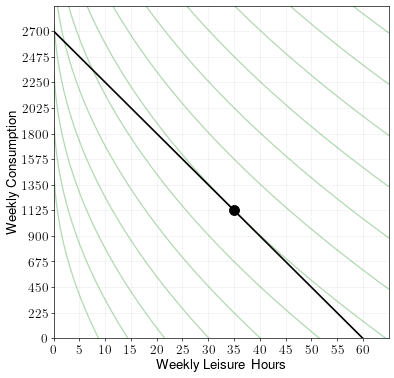

True

In [6]:
prob = get_random_prob(LeisureExp, "LeisureExp_examples.csv")
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, with_solution=True)

In [7]:
examples

,a,kn,kd,w,cmax,c,l,h,U
0,94.868330,1,2,15,900,750.0,10.0,50.0,1050.0
1,116.189500,1,2,15,900,675.0,15.0,45.0,1125.0
2,134.164079,1,2,15,900,600.0,20.0,40.0,1200.0
3,150.000000,1,2,15,900,525.0,25.0,35.0,1275.0
4,164.316767,1,2,15,900,450.0,30.0,30.0,1350.0
...,...,...,...,...,...,...,...,...,...
1454,384.744588,2,3,75,18000,1500.0,40.0,20.0,6000.0
1455,2837.224827,1,4,75,18000,3000.0,20.0,40.0,9000.0
1456,4771.624373,1,4,75,18000,1500.0,40.0,20.0,13500.0
1457,670.820393,2,4,75,18000,3000.0,20.0,40.0,6000.0
